In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
data = pd.read_csv("https://raw.githubusercontent.com/waqil52/AI-Assignment/master/House_Rent_Prediction/houserent_dataset_kansas_city.csv")
data.head()
#first five rows of given data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.tail()
#last five rows of given data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
data = data.drop(['id', 'date'], axis=1)
#let's delete id and date since they serve no purpose to our analysis

In [7]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

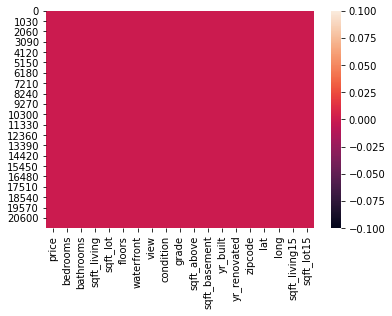

In [6]:
sns.heatmap(data.isnull())
#checking null value in given data set

In [8]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
data.describe

<bound method NDFrame.describe of           price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ... -122.257           1340        5650
1      538000.0         3       2.25  ... -122.319           1690        7639
2      180000.0         2       1.00  ... -122.233           2720        8062
3      604000.0         4       3.00  ... -122.393           1360        5000
4      510000.0         3       2.00  ... -122.045           1800        7503
...         ...       ...        ...  ...      ...            ...         ...
21608  360000.0         3       2.50  ... -122.346           1530        1509
21609  400000.0         4       2.50  ... -122.362           1830        7200
21610  402101.0         2       0.75  ... -122.299           1020        2007
21611  400000.0         3       2.50  ... -122.069           1410        1287
21612  325000.0         2       0.75  ... -122.299           1020        1357

[21613 rows x 19 columns]>

In [10]:
data.count

<bound method DataFrame.count of           price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ... -122.257           1340        5650
1      538000.0         3       2.25  ... -122.319           1690        7639
2      180000.0         2       1.00  ... -122.233           2720        8062
3      604000.0         4       3.00  ... -122.393           1360        5000
4      510000.0         3       2.00  ... -122.045           1800        7503
...         ...       ...        ...  ...      ...            ...         ...
21608  360000.0         3       2.50  ... -122.346           1530        1509
21609  400000.0         4       2.50  ... -122.362           1830        7200
21610  402101.0         2       0.75  ... -122.299           1020        2007
21611  400000.0         3       2.50  ... -122.069           1410        1287
21612  325000.0         2       0.75  ... -122.299           1020        1357

[21613 rows x 19 columns]>

In [11]:
#getting all columns except price as independent features and price as dependent feature
ind_feat = data.iloc[:,1:]
dep_feat = data.iloc[:,0]

ind_feat.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
#splitting data randomly into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.33, random_state=0)

In [13]:
regressor = ExtraTreesRegressor(n_estimators=600)
regressor.fit(X_train, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=600, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

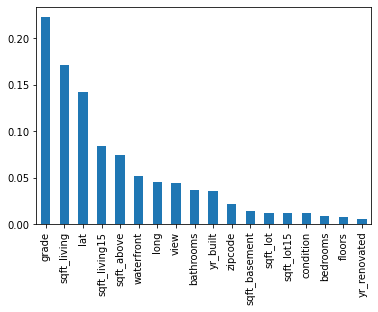

In [15]:
#now let's find the importance of each independent feature and visualize it
feature_importances = pd.Series(regressor.feature_importances_, index=ind_feat.columns)
feature_importances.nlargest(18).plot(kind='bar')
plt.show()

In [18]:
X_Best = SelectKBest(mutual_info_regression, k=18).fit_transform(ind_feat, dep_feat)
print(X_Best.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_Best, dep_feat, test_size=0.33, random_state=0)
print(regressor.score(X_test,Y_test))
cross_val_score(regressor, X_train, Y_train, cv=8)

(21613, 18)
0.8606115731307296


array([0.8848511 , 0.84529823, 0.87256846, 0.88029552, 0.8866156 ,
       0.88764189, 0.87820473, 0.87592285])

In [19]:
corr_matrix = data.corr()
#getting correlation matrix of every feature to determine the relation between each features
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


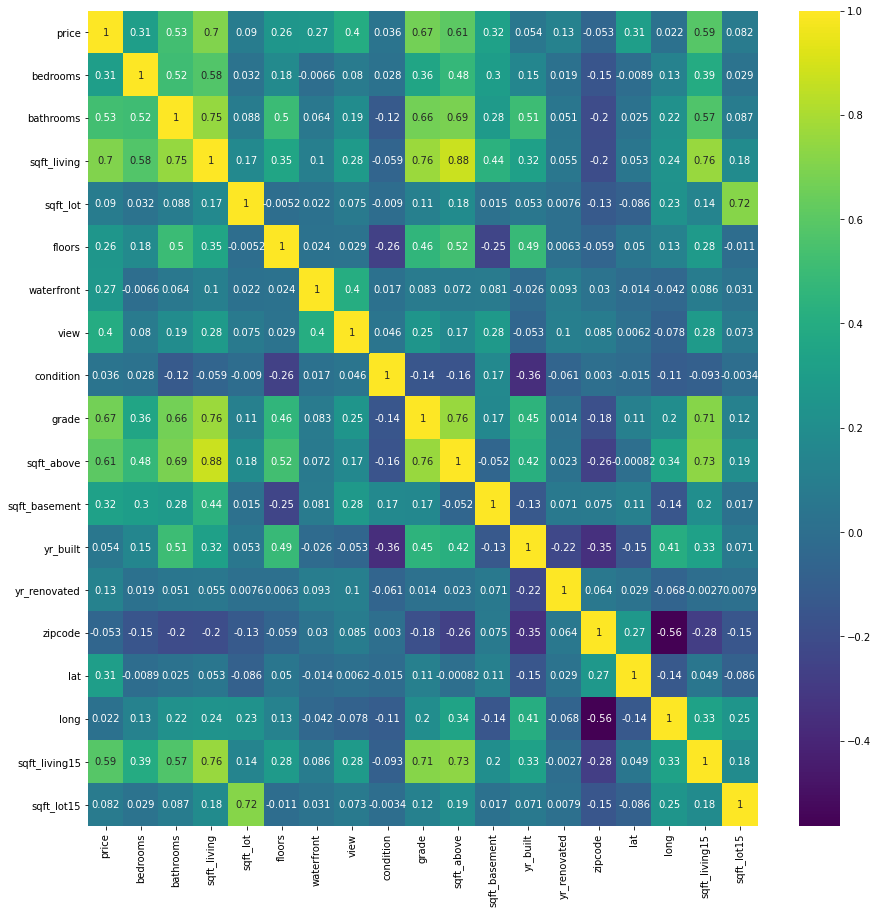

In [20]:
corr_features = corr_matrix.index
plt.figure(figsize=(15,15))
#getting a heatmap with the correlation matrix
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="viridis")

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.33, random_state=0)
neuralNetworkModel = Sequential()

# Input Layer
neuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers 
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Output Layer 
neuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compiling the network 
neuralNetworkModel.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error'])
neuralNetworkModel.summary()

# Fitting ANN to the Training set
neuralNetworkModel.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

In [22]:
prediction = neuralNetworkModel.predict(X_test)

In [23]:
#checking Mean Squared Error
metrics.mean_squared_error(Y_test, prediction)

50844117817.28788

In [26]:
test_input = [[	3,	1,	1190,	9199,	1,	0,	0,	3,	7,	1190,	0,	1955,	0,	98148,	47.4258,	-122.322,	1190,	9364]]
actual_output = 278000
test_output = neuralNetworkModel.predict(test_input)
print(actual_output)
print(test_output)

278000
[[284847.9]]
